# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Oct 26, 2023 2:26PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** ALLYN CHRISTIAN I. QUIAMJOT

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [6]:
def f(x):                               #   defining the function
    y = 2*x**4 + 3*x**2 + 4*x + 5
    return y

n_list = [10,100,1000]                  #   iterate the below for loop 3 times using 10, 100, and 1000 slices
tr_result = []
tr_percentError =[]
sr_result = []
sr_percentError =[]

a = 0.0                             #   lower limit of integration
b = 5.0                             #   upper limit of integration
theo = 1450                         #   theoretical value of definite integral

print("\033[1m" + "USING TRAPEZOIDAL RULE:" + "\033[0m\n")
for n in n_list:
    h = (b-a)/n                         #   width of each slice

    sum = 0.5*f(a) + 0.5*f(b)           
    for k in range(1,n):                #   iterate for loop n-1 time
        sum += f(a + k*h)               #   summation

    def_integral = h*sum                #   definite integral of f(x) from 0 to 5 using n slices
    tr_result.append(def_integral)      #   store results in a list

    print("Definite integral using " + str(n) + " slices: " + "\t" +str(def_integral))

#   defining percent error function that takes observed value as argument
def percent_error(observed):            
    return round((abs((theo-observed)/theo))*100, 10) 

#   creating a loop that shows percent error for each number of slices
for i in range(0,len(tr_result)):
    print("Percent error for "+ str(n_list[i]) +" slices:"+ "\t"*2 + str(percent_error(tr_result[i])) + " %")
    tr_percentError.append(percent_error(tr_result[i]))     #store percent errors in a list


USING TRAPEZOIDAL RULE:

Definite integral using 10 slices: 	1471.4375
Definite integral using 100 slices: 	1450.2145812500003
Definite integral using 1000 slices: 	1450.0021458331234
Percent error for 10 slices:		1.4784482759 %
Percent error for 100 slices:		0.0147987069 %
Percent error for 1000 slices:		0.0001479885 %


In [7]:
print("\n\033[1m" + "USING SIMPSON'S RULE:" + "\033[0m\n")

def simpsonsIntegral(n):                        #   defining simpson's rule integral  function
    h = (b-a)/n
    sum = f(a) + f(b)
    
    for i in range(1,n,2):                      #   for loop that iterates on odd values of i
        sum += 4*f(a + i*h)                     #   new sum with odd i
    for i in range(2,n,2):                      #   for loop that iterates on even values of i
        sum += 2*f(a + i*h)                     #   new sum with even i
    sum = (1./3)*sum*h                          
    return sum

def pct_error(observed):                        #   defining function that calculates percent error
    return (abs((theo-observed)/theo))*100
 
for i in n_list:
    sr_result.append(simpsonsIntegral(i))                           #   stores integral for n slices into a list
    sr_percentError.append(percent_error(simpsonsIntegral(i)))      #   stores percent error for n slices into a list

for i in range(0,len(sr_result)):
    print("Definite integral using "+str(n_list[i])+" slices: \t"+str(sr_result[i]))
for i in range(0, len(sr_result)):
    print("Percent error for "+ str(n_list[i])+ " slices: \t" + str(pct_error(sr_result[i])) +" %")


USING SIMPSON'S RULE:

Definite integral using 10 slices: 	1450.0833333333333
Definite integral using 100 slices: 	1450.0000083333337
Definite integral using 1000 slices: 	1450.0000000008342
Percent error for 10 slices: 	0.005747126436776382 %
Percent error for 100 slices: 	5.747126657485657e-07 %
Percent error for 1000 slices: 	5.753338035870472e-11 %


Given the same number of slices, the percent error for Simpson's rule is significantly lower than trapezoidal rule. For Simpson's rule, percent error decreases by a factor of 10^-4 for every order of 10 slices

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [8]:
from numpy import ones, copy, cos, tan, pi, linspace

def gaussxw(N):
    #   Initial approximation to roots of the Legendre Polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)             #   creates an array of N equally spaced values from 3 to 4N-1, then divided it by 4N+2
    x = cos(pi*a+1/(8*N*N*tan(a)))              #   approximation of roots using values of a

    #   Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    #   while loop that stores accurate roots of the Legendre polynomial up to accuracy of 1e-15
    while delta>epsilon:                        #   stops when delta is lesser than or equal to epsilon
        p0 = ones(N,float)                      #   p0 is set as an array of size N with float values, all values set to 1.
        p1 = copy(x)                            #   copy of x
        for k in range(1,N):                    
            p0,p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)       #   calculates the weights for each of the roots
    return x,w                                  #   returns the accurate roots and weights

In [9]:
def f(x):                               #   defining function to be integrated
    y = 2*x**4 + 3*x**2 + 4*x + 5
    return y

N = 3
a = 0.0
b = 5.0

#   Calculate sample points and weights, then map them to the required integration domain
x,w = gaussxw(N)                        #   store returned values from gaussxw function as x and w
xp = 0.5*(b-a)*x + 0.5*(b+a)            #   maps the calculated nodes from [-1,1] to [a,b]
wp = 0.5*(b-a)*w                        #   rescale weights according to a and b

#   Perform integration
s = 0.0
for k in range(N):                      #   loop  for summation using rescaled weights and corresponding  
    s += wp[k]*f(xp[k])                 #   values for f(x) at new mapped points (nodes)

print("The definite integral is",s)


The definite integral is 1450.000000000002


Compared to Simpson's rule and Trapezoidal rule, we can get an accurate answer using Gaussian quadrature with only a small a small N (3 in this case). The limits of integration can be applied by rescaling the nodes and weights. Gaussian quadrature can achieve high accuracy for polynomials of degree 2N-1, meaning it offers wider range of functions. With N=3, this method is accurate for polynomials up to degree 5. The order of the integrand in this problem is 4, which is below the 5th order. This method provides very accurate answers.

### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

The period for amplitude 0.75 is: 4.864125445390952


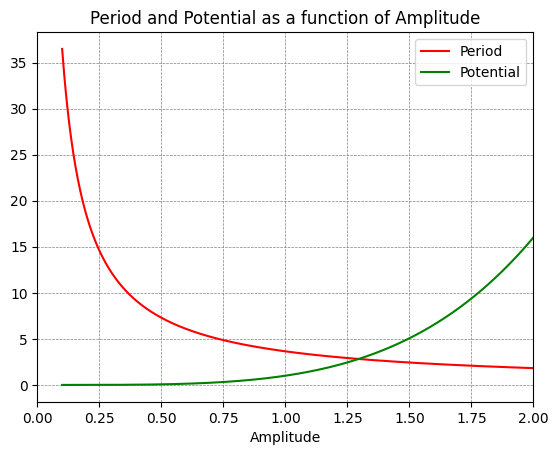

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
m = 1                                           #   mass
N = 20                                          

def V(x):                                       #   defining potential function
    return x**4
def integrand(a,x0):                            #   defining the function to be integrated that takes amplitude and x0 points as argument
    return 1/(math.sqrt(V(a)-V(x0)))
def inner_integral(a):                          #   function that calculates integral
    x,w = gaussxw(N)                      
    xp = 0.5*(a)*x + 0.5*(a)                    #   scaling points depend on a+0 and a-0, both are a in this case of upper and lower limits of integration
    wp = 0.5*(a)*w                        

    s = 0.0
    for k in range(N):                          #   Performing integration
        s += wp[k]*integrand(a,xp[k])
    return s
def T(integral):                                #   function that returns value of period
    return integral*math.sqrt(8*m)

num1 = float(input('Enter amplitude: '))                                       #   asks user for amplitude
print('The period for amplitude',num1,'is:', T(inner_integral(num1)))         #   print period 

amplitude = np.linspace(0.1,2,1000)             #   set datapoints to be used as amplitude
period=[]                                       #   initialize array
for i in amplitude:                             #   loop that stores period in an array
    period.append(T(inner_integral(i)))

#   plotting potential and and period in the same graph for comparison
plt.plot(amplitude, period, color = 'red', label = 'Period')
plt.plot(amplitude, V(amplitude), color = 'green', label = 'Potential')
plt.xlabel('Amplitude')
plt.xlim(0,2)
plt.legend()
plt.title('Period and Potential as a function of Amplitude')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

The period decreases as amplitude increases. The decay is exponential, and period approaches zero as amplitude --> infinity. The physical meaning to this is that it will take a shorter time to complete one cycle as amplitude is increased. 